### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

sns.despine(left=True, bottom=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format','{:.4f}'.format)
sns.set()
%matplotlib inline

### Load Dataset

In [109]:
irregular = pd.read_csv('..\\data_ds\\aggregate_median_irregularities_Kota Bandung.csv')
irregular.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,date,median_jam_level,id,geometry
8543,2022-08-19 18:00:00.000,32.7300,KOTA BANDUNG,Wastukencana,3,660.0000,216.5000,25.1650,8,NaN,282.0000,8.4100,2022-08-19,3.0000,1561514,"MULTILINESTRING ((107.604386 -6.904016, 107.60..."
5296,2022-08-03 17:00:00.000,32.7300,KOTA BANDUNG,N11 Soekarno-Hatta,3,1428.0000,332.0000,20.3900,7,NaN,455.0000,11.2900,2022-08-03,3.0000,1539442,"MULTILINESTRING ((107.575901 -6.930202, 107.57..."
10223,2022-08-30 18:00:00.000,32.7300,KOTA BANDUNG,Cigondewah Kaler,4,588.0000,527.0000,16.5000,6,NaN,650.0000,3.2500,2022-08-30,4.0000,1574488,"MULTILINESTRING ((107.566859 -6.939473, 107.56..."
7986,2022-08-18 06:00:00.000,32.7300,KOTA BANDUNG,Soekarno-Hatta (Jalur Lambat),4,1742.0000,798.0000,17.2900,25,NaN,926.0000,7.1200,2022-08-18,4.0000,1559969,"MULTILINESTRING ((107.666996 -6.938965, 107.66..."
6689,2022-08-11 17:00:00.000,32.7300,KOTA BANDUNG,Jalan Kuningan Raya,4,533.0000,516.0000,20.5700,23,NaN,583.0000,3.2800,2022-08-11,4.0000,1551190,"MULTILINESTRING ((107.66024 -6.913727, 107.660..."


In [110]:
irregular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11281 entries, 0 to 11280
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       11281 non-null  object 
 1   kemendagri_kabupaten_kode  11281 non-null  float64
 2   kemendagri_kabupaten_nama  11281 non-null  object 
 3   street                     11279 non-null  object 
 4   jam_level                  11281 non-null  int64  
 5   median_length              11281 non-null  float64
 6   median_delay_seconds       11281 non-null  float64
 7   median_regular_speed       11281 non-null  float64
 8   total_records              11281 non-null  int64  
 9   cause_type                 0 non-null      float64
 10  median_seconds             11281 non-null  float64
 11  median_speed               11281 non-null  float64
 12  date                       11281 non-null  object 
 13  median_jam_level           11281 non-null  flo

In [111]:
irregular.describe()

,kemendagri_kabupaten_kode,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,median_jam_level,id
count,11281.0000,11281.0000,11281.0000,11281.0000,11281.0000,11281.0000,0.0000,11281.0000,11281.0000,11281.0000,11281.0000
mean,32.7300,3.5471,1389.0950,584.4868,17.4797,14.0081,NaN,723.9772,7.4301,3.5471,1540736.9231
std,0.0000,0.5788,853.6588,275.7439,9.1330,14.9567,NaN,308.1615,4.2803,0.5788,25637.8360
min,32.7300,1.0000,500.0000,-97.0000,2.4500,1.0000,NaN,132.0000,0.8800,1.0000,1492844.0000
25%,32.7300,3.0000,788.0000,402.0000,12.4450,4.0000,NaN,523.0000,4.6700,3.0000,1520824.0000
50%,32.7300,4.0000,1158.0000,560.0000,16.2500,9.0000,NaN,690.0000,6.6650,4.0000,1542382.0000
75%,32.7300,4.0000,1742.0000,724.0000,20.3700,19.0000,NaN,879.0000,9.1400,4.0000,1561431.0000
max,32.7300,4.0000,13201.0000,4368.5000,90.1000,176.0000,NaN,4295.5000,54.8100,4.0000,1583491.0000


### Null Values

In [112]:
irregular.isna().sum()

time                             0
kemendagri_kabupaten_kode        0
kemendagri_kabupaten_nama        0
street                           2
jam_level                        0
median_length                    0
median_delay_seconds             0
median_regular_speed             0
total_records                    0
cause_type                   11281
median_seconds                   0
median_speed                     0
date                             0
median_jam_level                 0
id                               0
geometry                         0
dtype: int64

terdapat 2 variabel yang memiliki data null. Variabel cause_type akan dihapus karena semua datanya null.
data yang kosong di variabel `street` akan diisi dengan `location unknown` 

### Duplicated Data 

In [113]:
irregular.duplicated().sum()

0

### Data Cleansing

In [114]:
irregular = irregular.drop(['kemendagri_kabupaten_kode','kemendagri_kabupaten_nama','cause_type'],axis=1)
irregular.sample()

,time,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,median_seconds,median_speed,date,median_jam_level,id,geometry
3783,2022-07-26 12:00:00.000,Garuda,4,658.0000,420.0000,20.3450,12,487.0000,4.8500,2022-07-26,4.0000,1527148,"MULTILINESTRING ((107.577589 -6.913658, 107.57..."


In [115]:
irregular.street = irregular.street.fillna('location unknown')

In [116]:
irregular.isna().sum()

time                    0
street                  0
jam_level               0
median_length           0
median_delay_seconds    0
median_regular_speed    0
total_records           0
median_seconds          0
median_speed            0
date                    0
median_jam_level        0
id                      0
geometry                0
dtype: int64

### Convert Data Type

In [117]:
irregular['time'] = pd.to_datetime(irregular['time'], errors='coerce')
irregular['date'] = pd.to_datetime(irregular['date'], errors='coerce')

## Exploratory Data Analysis

Univariate

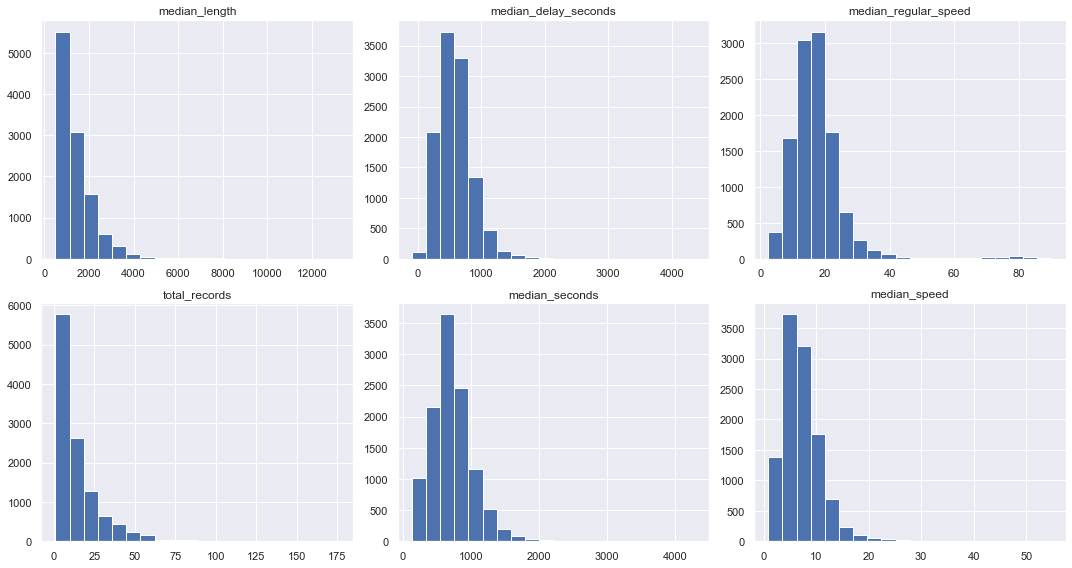

In [118]:
(
    irregular
    .loc[:,['median_length', 'median_delay_seconds', 'median_regular_speed','total_records','median_seconds','median_speed']]
    .hist(bins=20, figsize=(15,8), layout=(-1,3))
)

plt.tight_layout()

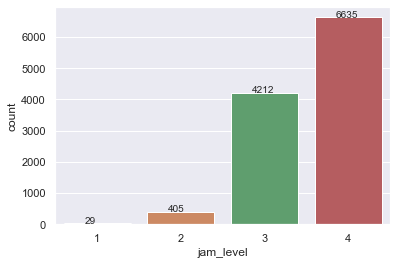

In [119]:
ax = sns.countplot(x='jam_level', data=irregular)
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.02))

plt.show()

In [120]:
irregular.groupby('street')['median_delay_seconds'].median().sort_values(ascending=False)

street
Dago Giri                   1172.0000
Tol Pasir Koja               959.0000
Pasirmuncang                 904.0000
Terusan Gegerkalong Hilir    895.0000
Jalan Citarum                843.0000
                               ...   
Jalan Raya Dayeuhkolot       287.5000
Cibodas Raya                 261.0000
Wastukencana                 257.0000
Cilengkrang 1                251.5000
Cinangka                     215.0000
Name: median_delay_seconds, Length: 230, dtype: float64

In [121]:
def line_plot_street(street, column):
    plt.figure(figsize=(8,6))
    sns.lineplot(data=irregular[irregular['street'] == street], x='time', y=column)
    plt.title('Tren {} in {}'.format(column,street), size=20, pad=20, weight='bold')
    plt.xticks(rotation=45)
    plt.show()

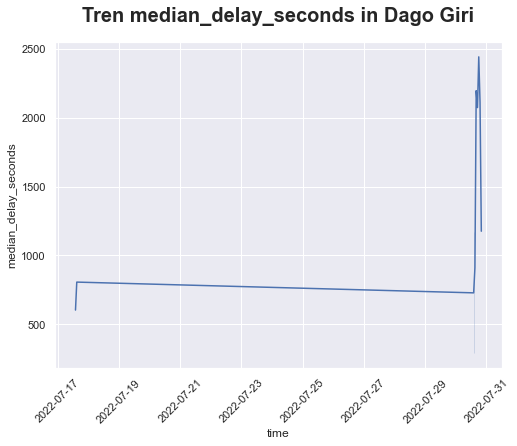

None


In [66]:
print(line_plot_street('Dago Giri', 'median_delay_seconds'))

### Correlation

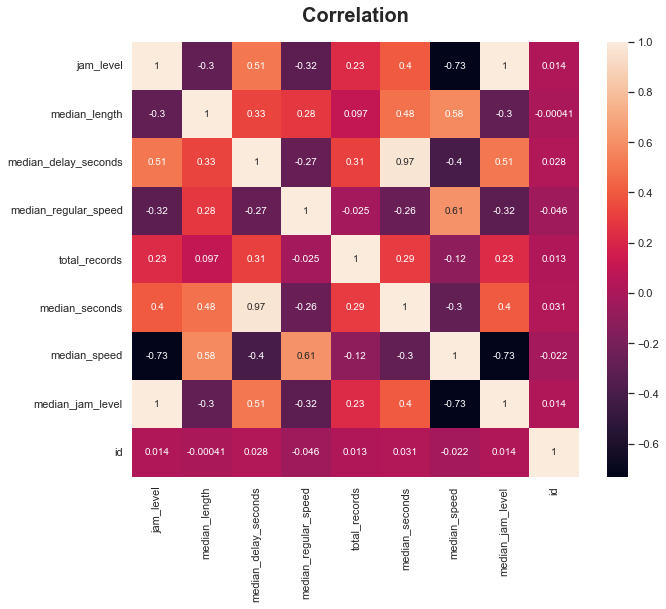

In [122]:
plt.figure(figsize=(10,8))
sns.heatmap(irregular.corr(), annot=True)
plt.title('Correlation', pad=20, size=20, weight='bold')
plt.show()

### Remove Features

untuk melanjutkan ke tahap analisis, maka menghapus feature yang tidak digunakan yaitu `time`, `street`, `date` dan `median_jam_level`

In [123]:
irregular = irregular.drop(['time','street','date','median_jam_level','id','geometry'],axis=1)
irregular.sample()

,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,median_seconds,median_speed
8335,4,674.0000,1055.0000,23.6900,23,1166.0000,2.0800


### Feature Scalling

In [124]:
from sklearn.preprocessing import StandardScaler

feat_scalling = list(irregular.select_dtypes('number').columns)
feat_scalling.remove('jam_level')
irregular[feat_scalling] = StandardScaler().fit_transform(irregular[feat_scalling])

irregular.head()

,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,median_seconds,median_speed
0,4,0.6243,0.2630,-0.1872,-0.0674,0.3895,0.0187
1,3,0.5036,-0.5929,0.0504,-0.8029,-0.4932,0.9742
2,4,-0.3808,0.0055,-0.3241,-0.2011,-0.1589,-0.3014
3,4,-0.5507,-0.0942,-0.2611,0.4006,-0.2985,-0.5748
4,3,0.7438,0.0526,-0.1806,-0.8698,0.2013,0.4275


### Save Data

In [126]:
irregular.to_csv('..\\data_ds\\irregular_preprocessing.csv')

### Separating Training and Testing Set

In [3]:
data = pd.read_csv('..\\data_ds\\irregular_preprocessing.csv')
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,median_seconds,median_speed
0,4,0.6243,0.2630,-0.1872,-0.0674,0.3895,0.0187
1,3,0.5036,-0.5929,0.0504,-0.8029,-0.4932,0.9742
2,4,-0.3808,0.0055,-0.3241,-0.2011,-0.1589,-0.3014
3,4,-0.5507,-0.0942,-0.2611,0.4006,-0.2985,-0.5748
4,3,0.7438,0.0526,-0.1806,-0.8698,0.2013,0.4275


In [4]:
X = data.drop('jam_level', axis=1)
y = data['jam_level']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test :', X_test.shape)
print('y_test :', y_test.shape)

X_train : (9024, 6)
y_train : (9024,)
X_test : (2257, 6)
y_test : (2257,)


### Oversampling using SMOTE

In [9]:
pd.Series(y).value_counts()

4    6635
3    4212
2     405
1      29
Name: jam_level, dtype: int64

In [10]:
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)
pd.Series(y_train_smote).value_counts()

4    5321
2    5321
3    5321
1    5321
Name: jam_level, dtype: int64

### Modelling

In [52]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,KFold,GridSearchCV,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,accuracy_score

In [20]:
lr = LogisticRegression()
svm = SVC()
dtc = DecisionTreeClassifier()
random = RandomForestClassifier()
nb = GaussianNB()

model = [lr, svm, dtc, random, nb]
model_name = []
for name in model:
    names = str(type(name)).split('.')[-1][:-2]
    model_name.append(names)

In [27]:
lr_score = cross_val_score(model[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
svm_score = cross_val_score(model[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
dtc_score = cross_val_score(model[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
random_score = cross_val_score(model[3], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(model[4], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [28]:
cv_result = [
            lr_score, svm_score, dtc_score, random_score, nb_score]

data_cv_result = pd.DataFrame(cv_result, index=model_name)
data_cv_result

,0,1,2,3,4
LogisticRegression,0.8985,0.8941,0.8901,0.8927,0.8941
SVC,0.9039,0.8914,0.8932,0.8927,0.8901
DecisionTreeClassifier,0.8609,0.8573,0.8586,0.8435,0.8520
RandomForestClassifier,0.9056,0.8910,0.8985,0.8892,0.8892
GaussianNB,0.8609,0.8351,0.8311,0.8369,0.8404


In [29]:
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1
    
data_cv = pd.DataFrame({'score_mean':cv_mean}, index=model_name).sort_values(['score_mean'], ascending =False)
data_cv

,score_mean
RandomForestClassifier,0.8947
SVC,0.8942
LogisticRegression,0.8939
DecisionTreeClassifier,0.8544
GaussianNB,0.8409


`RandomForestClassifier` memiliki performa terbaik dengan rata-rata nilai akurasi sebesar 89,47%

In [43]:
train_score = []
test_score = []
default_model = []

skf = StratifiedKFold(random_state=42, shuffle=True)
data_train_test = pd.DataFrame()

for train_index, test_index in skf.split(X_train_smote, y_train_smote):
    for i in model:
        default_model.append(i.fit(X_train_smote, y_train_smote))
        train_score.append(i.score(X_train_smote, y_train_smote))
        test_score.append(i.score(X_test, y_test))

In [44]:
train_score_lr = np.sum(train_score[0::12])/len(train_score[0::12])
train_score_svm = np.sum(train_score[1::12])/len(train_score[1::12])
train_score_dtc = np.sum(train_score[2::12])/len(train_score[2::12])
train_score_random = np.sum(train_score[3::12])/len(train_score[3::12])
train_score_nb = np.sum(train_score[4::12])/len(train_score[4::12])

In [45]:
test_score_lr = np.sum(test_score[0::12])/len(test_score[0::12])
test_score_svm = np.sum(test_score[1::12])/len(test_score[1::12])
test_score_dtc = np.sum(test_score[2::12])/len(test_score[2::12])
test_score_random = np.sum(test_score[3::12])/len(test_score[3::12])
test_score_nb = np.sum(test_score[4::12])/len(test_score[4::12])

In [48]:
train_ = [train_score_lr, train_score_svm, train_score_dtc, train_score_random,train_score_nb]

test_ = [test_score_lr,test_score_svm,test_score_dtc, test_score_random,test_score_nb]

data_avg_score = pd.DataFrame({
    'train score' :train_,
    'test score' :test_},
    index=model_name)

data_avg_score['difference'] = abs(data_avg_score['train score'] - data_avg_score['test score'])
data_avg_score = data_avg_score.sort_values(['difference'], ascending=True)
data_avg_score

,train score,test score,difference
GaussianNB,0.8516,0.8316,0.0199
LogisticRegression,0.9019,0.8423,0.0596
RandomForestClassifier,0.9578,0.8908,0.0670
SVC,0.9565,0.8883,0.0682
DecisionTreeClassifier,0.8950,0.8226,0.0725


Berdasarkan hasil dari evaluasi model, maka dipilih model dengan `Logistic Regression` karena nilai training dan testing yang cukup tinggi 

### Logistic Regression

In [50]:
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

y_predict = lr.predict(X_test)

train_score_ = round((lr.score(X_train_smote, y_train_smote) * 100), 2)
test_score_ = round((lr.score(X_test, y_test) * 100), 2)
f1_score_ = round((f1_score(y_test, y_predict, average='macro')) * 100,2)

print('Training Accuracy : {}%'.format(train_score_))
print('Test Accuracy : {}%'.format(test_score_))
print('F1 Macro : {}%'.format(f1_score_))

Training Accuracy : 91.56%
Test Accuracy : 88.21%
F1 Macro : 73.2%


### Model Evaluation

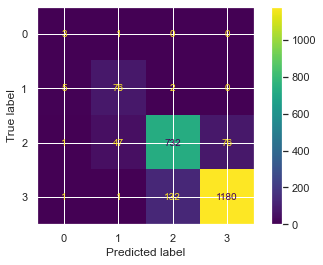

In [53]:
confusion_matrix = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(confusion_matrix).plot()
plt.show()

In [55]:
classification = classification_report(y_test, y_predict)
print(classification)

              precision    recall  f1-score   support

           1       0.30      0.75      0.43         4
           2       0.61      0.92      0.73        83
           3       0.85      0.86      0.85       856
           4       0.94      0.90      0.92      1314

    accuracy                           0.88      2257
   macro avg       0.67      0.85      0.73      2257
weighted avg       0.89      0.88      0.88      2257

